In [1]:
%%capture

from google.colab import drive, files
drive.mount('/content/drive/')
%cd /content/drive/My Drive/AI/NewsCrawl

!pip install underthesea

In [2]:
import pandas as pd
import numpy as np
from glob import glob
from wordcloud import WordCloud 
from underthesea import word_tokenize, sent_tokenize

In [20]:
dataset = []
# dataset.extend(glob('./vnexpress-dataset/vnexpress-dataset-origin/*.xlsx'))
# dataset.extend(glob('./dantri-dataset/dantri-dataset-origin/*.xlsx'))
dataset.extend(glob('./vnexpress-dantri-merged/*.xlsx'))
dataset.remove('./vnexpress-dantri-merged/train.xlsx') 
dataset.remove('./vnexpress-dantri-merged/test.xlsx')
dataset

['./vnexpress-dantri-merged/thoi-su.xlsx',
 './vnexpress-dantri-merged/the-gioi.xlsx',
 './vnexpress-dantri-merged/kinh-doanh.xlsx',
 './vnexpress-dantri-merged/the-thao.xlsx',
 './vnexpress-dantri-merged/giai-tri.xlsx',
 './vnexpress-dantri-merged/phap-luat.xlsx',
 './vnexpress-dantri-merged/suc-khoe.xlsx',
 './vnexpress-dantri-merged/giao-duc.xlsx',
 './vnexpress-dantri-merged/khoa-hoc-cong-nghe.xlsx',
 './vnexpress-dantri-merged/du-lich.xlsx',
 './vnexpress-dantri-merged/oto-xe-may.xlsx']

In [22]:
list_df = [len(pd.read_excel(data)) for data in dataset]

In [23]:
df = pd.read_excel(dataset[0])
df.head(2)

,id,title,content,label
0,efde56c2-b0d4-4aef-91dd-874058c186ac,1.000 ha dừa Bến Tre nhiễm sâu đầu đen,"Sáng gần giữa tháng tư, ông Nguyễn Long Hổ (50...",0
1,26af923d-7550-4d59-a5cd-1ccfb2e988ff,1.000 túi thuốc hỗ trợ F0 điều trị tại nhà,"Sáng 17/9, 1.000 túi thuốc đóng gói sẵn được c...",0


In [25]:
data_in_df = [] 
for data in dataset:
        data_in_df.extend(list(pd.read_excel(data)['content']))

print(f"Có tổng cộng {len(list(data_in_df))} bài viết")

Có tổng cộng 59333 bài viết


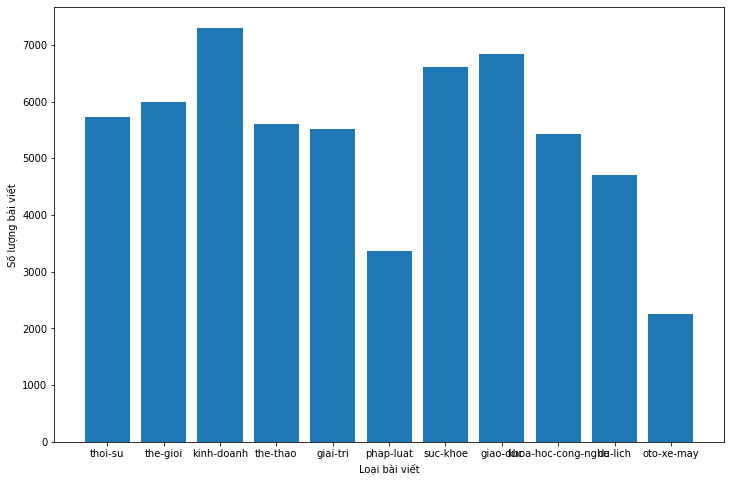

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

list_type = [t.replace('./vnexpress-dantri-merged/', '').replace('.xlsx', '') for t in dataset]

ax.bar(list_type, list_df)
ax.set_ylabel('Số lượng bài viết')
ax.set_xlabel('Loại bài viết')
plt.show()

In [30]:
train_df  = []
test_df = []
train_df.extend(list(pd.read_excel('./vnexpress-dantri-merged/train.xlsx')['content']))
test_df.extend(list(pd.read_excel('./vnexpress-dantri-merged/test.xlsx')['content']))

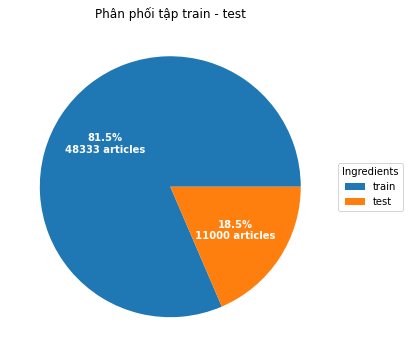

In [49]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
recipe = ["train", "test"]
data = [len(train_df), len(test_df)]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d} articles".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Phân phối tập train - test")

plt.show()

In [9]:
stopwords = ['có', 'thì', 'là', 'ở', 'biết', 'buổi', 'bấy', 'bởi', 'bỗng', 'cho', 'chắc', 'chỉ', 'chứ', 'giờ', 'hết', 'khá', 'nhất', 'nữa', 'và', 'đến', 'cho biết', 'có thể', 'chúng tôi']

In [10]:
data_in_df[1]

'Sáng 17/9, 1.000 túi thuốc đóng gói sẵn được chuyển đến kho dược của Trung tâm Y tế trên đường Khánh Hội, phường 3, quận 4. Hiện nay, quận 4 có khoảng 2.100 F0 đang cách ly, điều trị tại nhà. Đây là đợt trao thứ 4 trong chương trình Túi thuốc F0 do Quỹ Hy vọng (Quỹ Hope) - Báo điện tử VnExpress phát động, có sự đồng hành của TV.Pharm. Sáng 17/9, 1.000 túi thuốc đóng gói sẵn được chuyển đến kho dược của Trung tâm Y tế trên đường Khánh Hội, phường 3, quận 4. Hiện nay, quận 4 có khoảng 2.100 F0 đang cách ly, điều trị tại nhà. Đây là đợt trao thứ 4 trong chương trình Túi thuốc F0 do Quỹ Hy vọng (Quỹ Hope) - Báo điện tử VnExpress phát động, có sự đồng hành của TV.Pharm. Đại diện Trung tâm Y tế quận 4 (thứ hai, từ phải sang) tiếp nhận những túi thuốc tài trợ. Ông Nguyễn Xuân Huân, giám đốc Trung tâm Y tế quận 4 chia sẻ: "Chúng tôi rất mừng khi nhận được 1.000 túi thuốc hỗ trợ các bệnh nhân điều trị tại nhà. Giai đoạn đầu dịch thuốc ít, hiện giờ có phân bổ từ Sở Y tế và các mạnh thường quân 

In [11]:
def remove_stopword(text):
    # stopwords = [line.replace('\n', '') for line in open('./vietnamese-stopwords.txt')]

    token_list = word_tokenize(text)
    
    for i in range(len(token_list)):
        for sw in stopwords:
            if (token_list[i] == sw):
                  token_list[i] = ''
              
    return " ".join(token_list)

In [12]:
def display_wordcloud(text):
    plt.rcParams["figure.figsize"] = (16,20)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

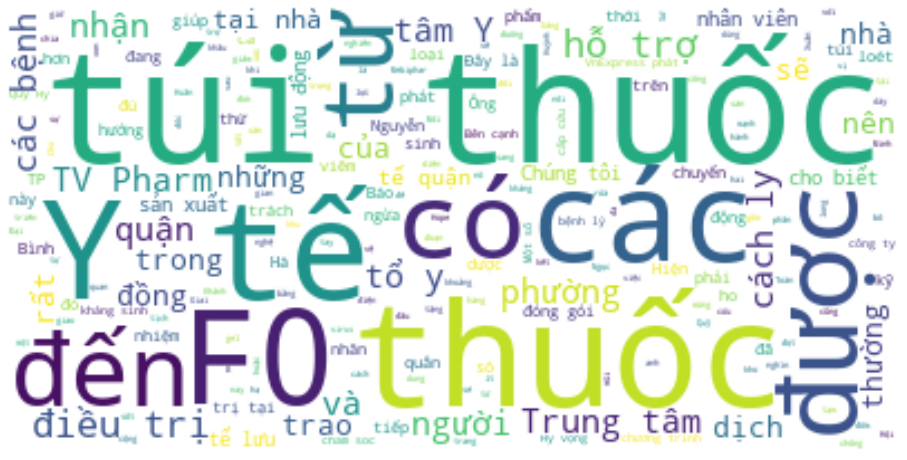

In [13]:
display_wordcloud(data_in_df[1])

In [14]:
dir = 'vnexpress-dantri-merged/'
topic = {
    'thời sự': dir + 'thoi-su.xlsx',
    'thế giới': dir + 'the-gioi.xlsx',
    'kinh doanh': dir + 'kinh-doanh.xlsx',
    'thể thao': dir + 'the-thao.xlsx',
    'giải trí': dir + 'giai-tri.xlsx',
    'pháp luật': dir + 'phap-luat.xlsx',
    'sức khỏe': dir + 'suc-khoe.xlsx',
    'giáo dục': dir + 'giao-duc.xlsx',
    'khoa học - công nghệ': dir + 'khoa-hoc-cong-nghe.xlsx',
    'du lịch - ẩm thực': dir + 'du-lich.xlsx',
    'oto xe máy': dir + 'oto-xe-may.xlsx'
}

In [15]:
def display_wordcloud_of_topic(topic):
    data_in_df = [] 
    temp = [ remove_stopword(content) for content in list(pd.read_excel(topic)['content']) ]
    data_in_df.extend(temp)
    text = " ".join(data_in_df)
    display_wordcloud(text)

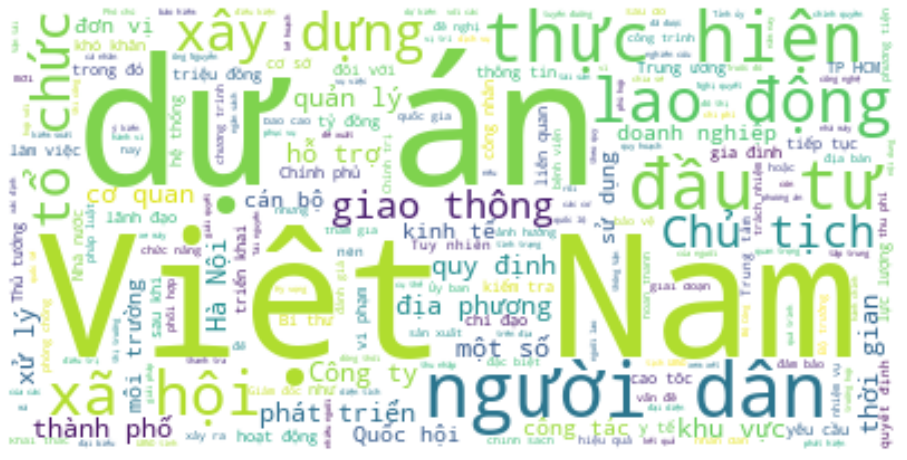

In [16]:
display_wordcloud_of_topic(topic['thời sự'])

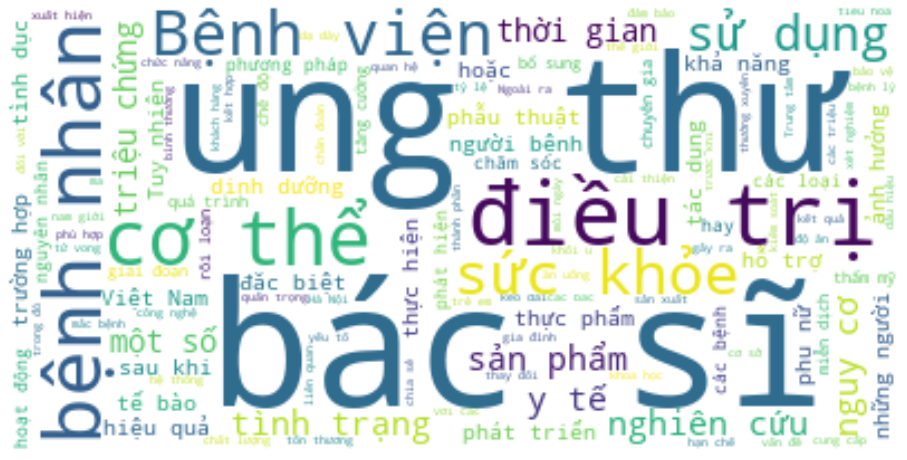

In [18]:
display_wordcloud_of_topic(topic['sức khỏe'])